In [77]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from config import gkey
import gmaps.datasets
import gmaps
import time

In [78]:
TPS_df = pd.read_csv("Accident_info.csv")
TPS_df.head()

,Unnamed: 0,LATITUDE,LONGITUDE,DATE,TIME,YEAR,ACCIDENT LANE,District,INTERSECTION,VICTIM,VICTIM AGE,VEHTYPE,DRIVACT,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,Cause,Neighbourh
0,0,43.816245,-79.227590,2012-01-12T05:00:00.000Z,558,2012,Minor Arterial,Scarborough,Intersection,Pedestrian,40 to 44,Other,,Yes,,Yes,,,,Malvern (132)
1,1,43.637614,-79.447742,2013-11-29T05:00:00.000Z,558,2013,Major Arterial,Toronto and East York,Mid-Block,Driver,25 to 29,"Automobile, Station Wagon",Lost control,,,Yes,,,Speeding,South Parkdale (85)
2,2,43.716773,-79.259883,2018-06-14T04:00:00.000Z,558,2018,Major Arterial,Scarborough,Intersection,Motorcycle Driver,55 to 59,Motorcycle,Driving Properly,,,Yes,Yes,,Unknown,Clairlea-Birchmount (120)
3,3,43.821345,-79.316890,2010-04-13T04:00:00.000Z,559,2010,Major Arterial,Scarborough,Intersection,Passenger,70 to 74,Other,,,,Yes,,,,Steeles (116)
4,4,43.728129,-79.574641,2014-11-09T05:00:00.000Z,559,2014,Major Arterial,Etobicoke York,Intersection,Passenger,20 to 24,,,,,Yes,,,,Rexdale-Kipling (4)


In [79]:
lats=[]
lngs=[]
for index,row in TPS_df.iterrows():
    lats.append(row[1])
    lngs.append(row[2])


In [80]:
popinc=pd.read_csv('Population Income Neighborhood.csv')
popinc.head()

,Unnamed: 0,Category,Population,Neighborhood Mean Income,Lat,Long
0,0,Agincourt North,"29,113",52532.74050,43.808053,-79.266502
1,1,Agincourt South-Malvern West,"23,757",50550.17153,43.788009,-79.283882
2,2,Alderwood,"12,054",55229.36660,43.601710,-79.545238
3,3,Annex,"30,526",45009.96767,43.669833,-79.407585
4,4,Banbury-Don Mills,"27,695",52962.59704,43.749115,-79.366359


In [81]:
# enable jupyter extensions
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
# install gmaps
!pip install gmaps
# enable gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [83]:
gmaps.configure(api_key=gkey)

In [84]:
a=[]
for z in range(0,len(popinc['Neighborhood Mean Income'])):
    a.append((popinc.iloc[z,3]/10000).astype(int))
    
x=(np.array(a)*2).astype(int)
len(x)
b=x.tolist()

In [66]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(TPS_df[["LATITUDE","LONGITUDE"]],max_intensity=1)

fig.add_layer(heat_layer)

marker_layer = gmaps.symbol_layer(popinc[["Lat","Long"]],stroke_opacity=0.4,fill_opacity=0.6,scale=b)# scale is income parameter
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [85]:
from math import sin, cos, sqrt, atan2, radians
def calculate_distance(lat1, lon1, lat2, lon2):
   R = 6373.0
   lat1 = radians(lat1)
   lon1 = radians(lon1)
   lat2 = radians(lat2)
   lon2 = radians(lon2)
   dlon = lon2 - lon1
   dlat = lat2 - lat1
   a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
   c = 2 * atan2(sqrt(a), sqrt(1 - a))
   return R * c
print(calculate_distance(52.2296756,21.0122287,52.406374,16.9251681))

278.54558935106695


In [90]:
popinc["Number of Accidents"]=0

,Unnamed: 0,Category,Population,Neighborhood Mean Income,Lat,Long,Number of Accidents
0,0,Agincourt North,"29,113",52532.74050,43.808053,-79.266502,0
1,1,Agincourt South-Malvern West,"23,757",50550.17153,43.788009,-79.283882,0
2,2,Alderwood,"12,054",55229.36660,43.601710,-79.545238,0
3,3,Annex,"30,526",45009.96767,43.669833,-79.407585,0
4,4,Banbury-Don Mills,"27,695",52962.59704,43.749115,-79.366359,0


In [92]:
for w in range(len(TPS_df)):
    mini=100000
    for y in range(len(popinc)):
           
        dist = calculate_distance(TPS_df.iloc[w,1],TPS_df.iloc[w,2],popinc.iloc[y,4],popinc.iloc[y,5])
        if (dist<mini):
            mini=dist
            y1=y
    popinc.iloc[y1,6]=popinco.iloc[y1,6]+1
popinc.head()

,Unnamed: 0,Category,Population,Neighborhood Mean Income,Lat,Long,Number of Accidents
0,0,Agincourt North,"29,113",52532.74050,43.808053,-79.266502,8
1,1,Agincourt South-Malvern West,"23,757",50550.17153,43.788009,-79.283882,5
2,2,Alderwood,"12,054",55229.36660,43.601710,-79.545238,1
3,3,Annex,"30,526",45009.96767,43.669833,-79.407585,1
4,4,Banbury-Don Mills,"27,695",52962.59704,43.749115,-79.366359,1


In [94]:
popinc=popinc.drop(axis='columns',columns='Unnamed: 0')

In [96]:
popinco=popinc.set_index('Category')

In [115]:
popinco.to_csv('Number of Accidents with Population and Income data.csv')

<IPython.core.display.Javascript object>


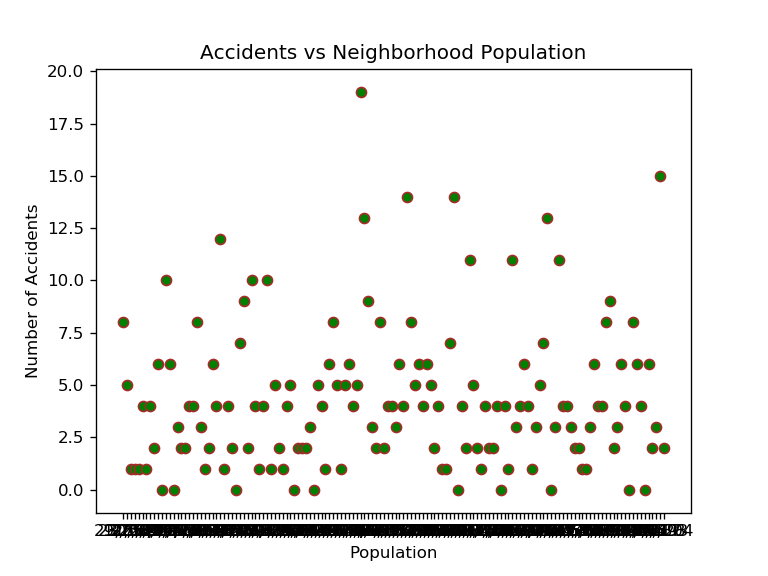

In [113]:
plt.scatter(popinco['Neighborhood Mean Income'],popinco['Number of Accidents'],marker='o',facecolors="green",edgecolors="brown")
plt.xlabel('Neighborhood Mean Income($)')
plt.ylabel('Number of Accidents')
plt.title('Accidents vs Neighborhood Income')
plt.savefig('Accidents vs Neighborhood Income')

In [114]:
plt.scatter(popinco['Population'],popinco['Number of Accidents'],marker='o',facecolors="green",edgecolors="brown")
plt.xlabel('Population')
plt.ylabel('Number of Accidents')
plt.title('Accidents vs Neighborhood Population')
plt.savefig('Accidents vs Neighborhood Population_')

In [110]:
filepath_TPS = "Fatal_Collisions.csv"
TPS_df = pd.read_csv(filepath_TPS)
a=TPS_df[TPS_df['IMPACTYPE']=='Pedestrian Collisions']
a